## Problem Statement

[Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales) competition on Kaggle:

> Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. 
>
>
> With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
>
> Data here: https://www.kaggle.com/c/rossmann-store-sales/data

## Downloading the Data

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/c/rossmann-store-sales/data")

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [5]:
import os
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [6]:
import pandas as pd

ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

> 'low_memory=False' is used to prevent this warning:
>
>
> "c:\Users\acayt\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)"

In [7]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Merging data from store_df to train and test dataframes:

In [10]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [11]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## EDA

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

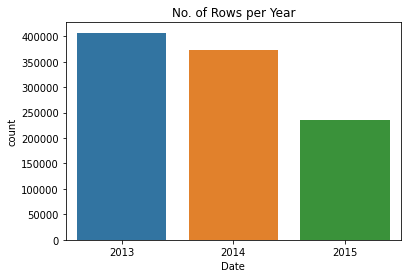

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(merged_df.Date).dt.year)

In [14]:
merged_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


<AxesSubplot:>

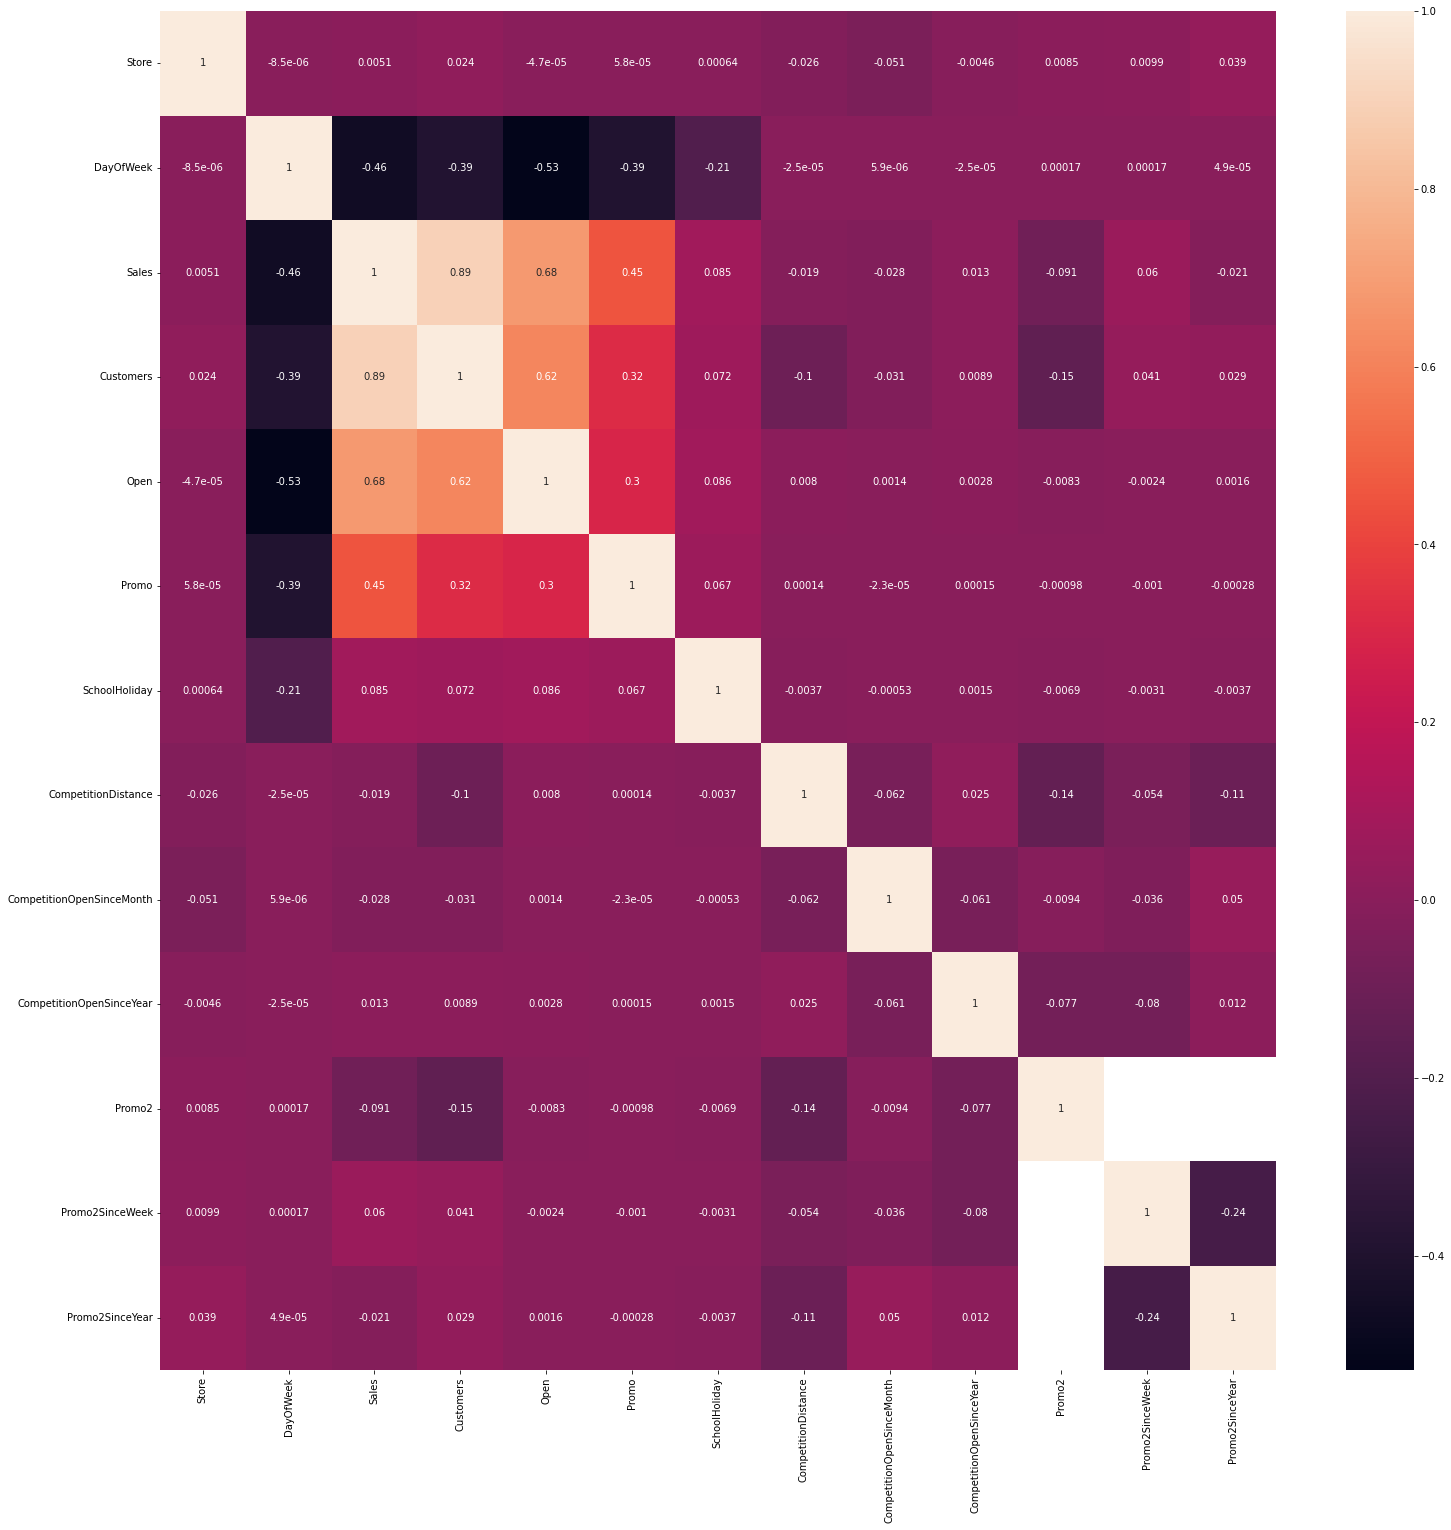

In [15]:
crm = merged_df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(crm, annot = True)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

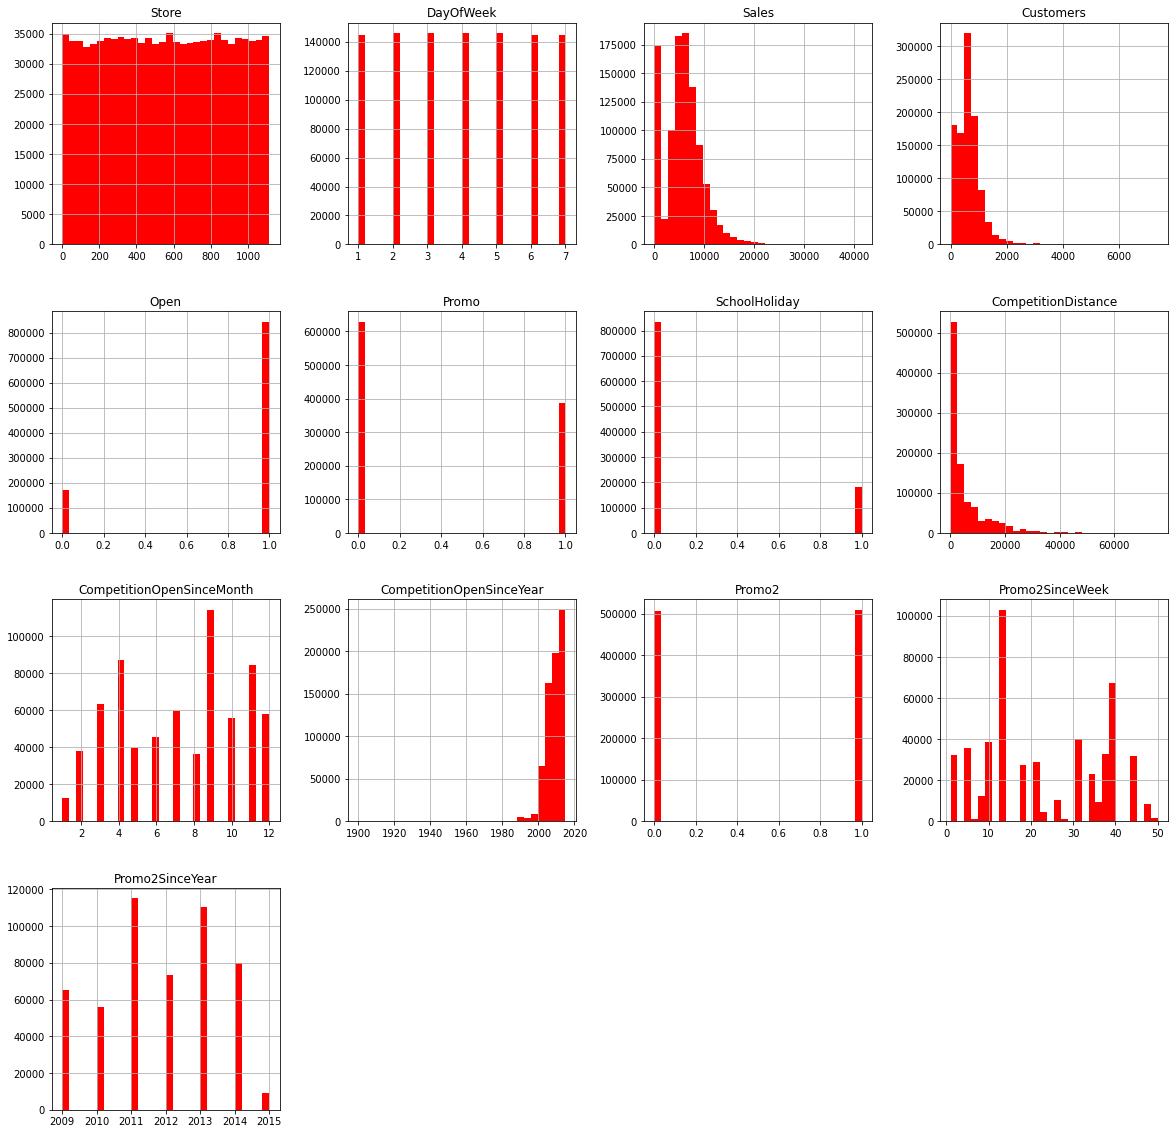

In [16]:
merged_df.hist(bins = 30, figsize=(20, 20), color = 'r')

## Preprocessing and FE

> `Date` column can be used to extract different parts of the date/day and what they symbolize <br>
> such as `Date`, `Day`, `Month`, `Year` etc

In [21]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [22]:
split_date(merged_df)
split_date(merged_test_df)

> `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [23]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [24]:
comp_months(merged_df)
comp_months(merged_test_df)

In [25]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
900585,2013-04-15,2460.0,2009.0,4.0,48.0
151537,2015-03-18,630.0,2015.0,2.0,1.0
765629,2013-08-14,40.0,2011.0,11.0,21.0
543582,2014-03-01,340.0,2012.0,9.0,18.0
293097,2014-11-01,17650.0,2013.0,11.0,12.0
264792,2014-12-01,910.0,NaN,NaN,0.0
868031,2013-05-14,13570.0,2010.0,5.0,36.0
86473,2015-05-15,1600.0,2006.0,6.0,107.0
759281,2013-08-20,970.0,2013.0,3.0,5.0
285719,2014-11-09,21370.0,2010.0,11.0,48.0


In [26]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

> Sales are 0 whenever the store is closed - general observation, supported by the data as well. <br>
> This can be hardcoded by dropping all the rows where the store is closed

In [27]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [28]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


> Some additional columns can also be engineered to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [29]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [30]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [31]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
340564,2014-09-11,1,2011.0,14.0,"Mar,Jun,Sept,Dec",41.278689,1
782094,2013-07-30,0,NaN,NaN,NaN,0.000000,0
380308,2014-07-31,0,NaN,NaN,NaN,0.000000,0
835775,2013-06-12,0,NaN,NaN,NaN,0.000000,0
619646,2013-12-23,1,2012.0,40.0,"Jan,Apr,Jul,Oct",14.754098,0
771183,2013-08-09,0,NaN,NaN,NaN,0.000000,0
849376,2013-05-31,0,NaN,NaN,NaN,0.000000,0
950949,2013-03-01,0,NaN,NaN,NaN,0.000000,0
78353,2015-05-22,0,NaN,NaN,NaN,0.000000,0
459371,2014-05-16,1,2013.0,10.0,"Mar,Jun,Sept,Dec",14.295082,0


### Selecting Input and Target attributes

In [32]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [33]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [34]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [35]:
test_inputs = merged_test_df[input_cols].copy()

In [36]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Imputing Missing data

In [37]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

> `CompetitionDistance` is the only missing value. <br>
> It can fill it with the highest value to indicate that competition is too far away to be even recorded.

In [38]:
max_distance = inputs.CompetitionDistance.max()

In [39]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

### Scaling Numeric data

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [41]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encoding Categorical data

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [43]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [44]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [45]:
X.shape

(844392, 30)

## Data Vizualization

Text(0.5, 1.0, 'Sales data per month')

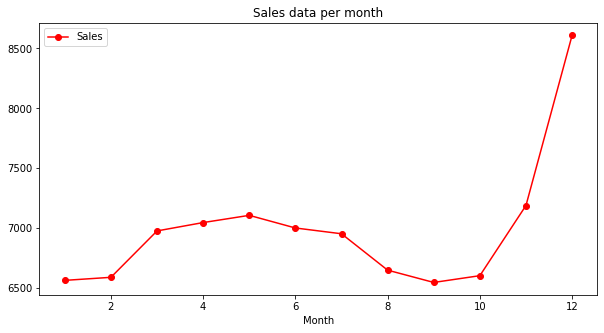

In [46]:
axis = merged_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Sales data per month')

Text(0.5, 1.0, 'Customer data per month')

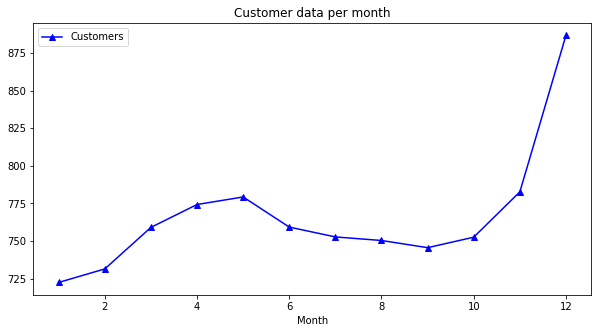

In [48]:
axis = merged_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Customer data per month')

Text(0.5, 1.0, 'Sales data per day')

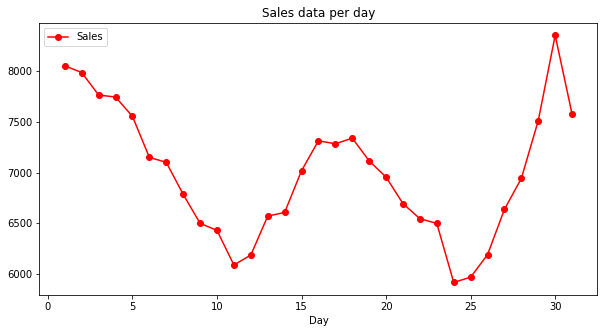

In [49]:
axis = merged_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Sales data per day')

Text(0.5, 1.0, 'Customer data per day')

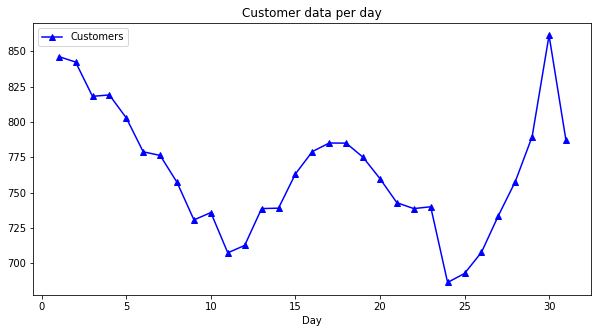

In [50]:
axis = merged_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Customer data per day')

Text(0.5, 1.0, 'Average sales by Day of the Week')

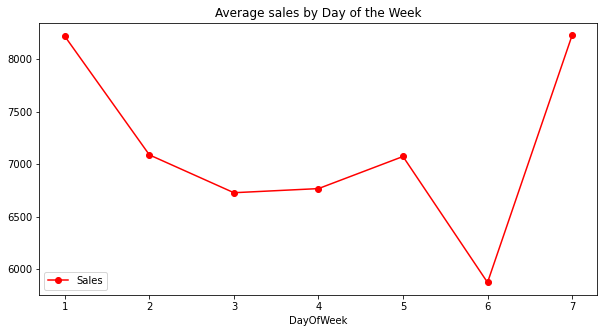

In [51]:
axis = merged_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average sales by Day of the Week')

Text(0.5, 1.0, 'Average customers by Day of the Week')

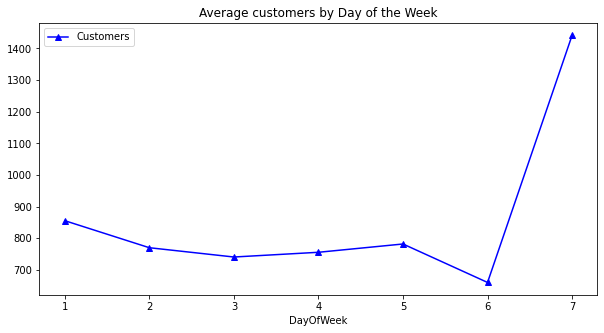

In [52]:
axis = merged_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average customers by Day of the Week')

<AxesSubplot:xlabel='Date'>

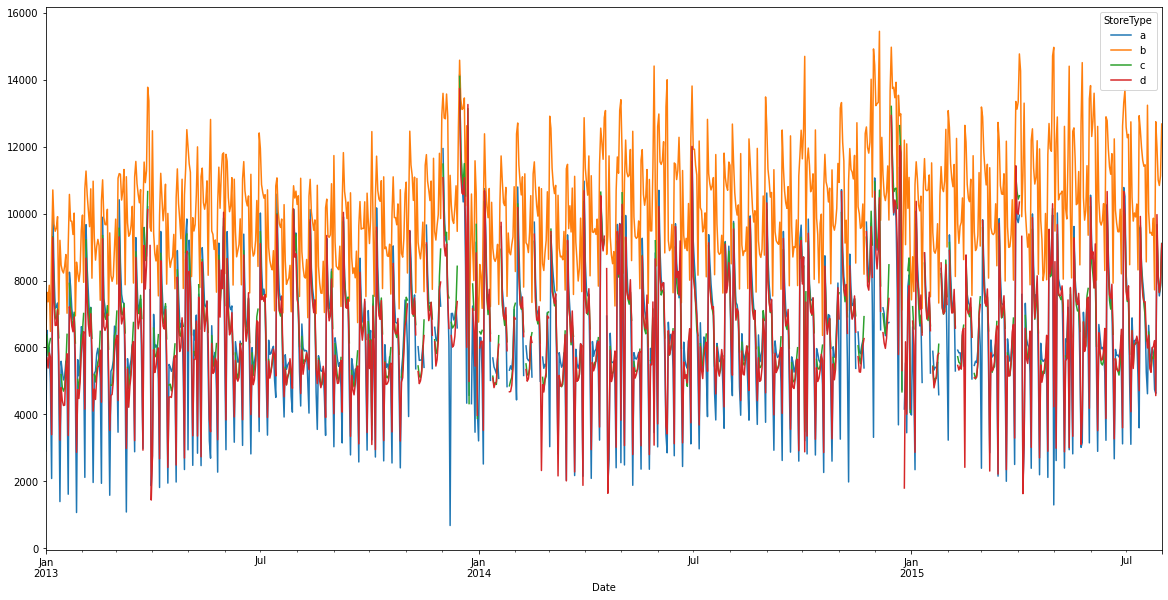

In [53]:
fig, ax = plt.subplots(figsize = (20,10))
merged_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

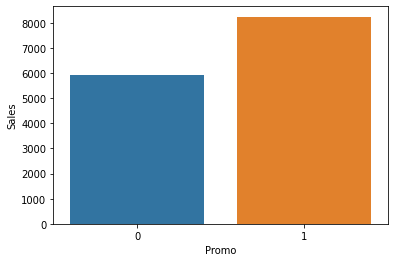

In [55]:
#Relation between Sales and Promo (avilable or not)
sns.barplot(x = 'Promo', y = 'Sales', data = merged_df)

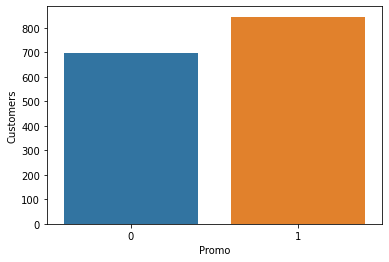

In [56]:
#Relation between Customers and Promo (avilable or not)
sns.barplot(x = 'Promo', y = 'Customers', data = merged_df)

## Model Training

In [108]:
import tensorflow as tf

neural_net = tf.keras.Sequential()

> Input Layer:

In [109]:
neural_net.add(tf.keras.layers.Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

> Hidden Layers:

In [110]:
neural_net.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
#neural_net.add(tf.keras.layers.Dropout(0.2))
neural_net.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
neural_net.add(tf.keras.layers.Dense(512, kernel_initializer='normal',activation='relu'))
neural_net.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))

> Output Layer:

In [111]:
neural_net.add(tf.keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

> Compiling the model

In [112]:
neural_net.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
neural_net.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               3968      
                                                                 
 dense_33 (Dense)            (None, 256)               33024     
                                                                 
 dense_34 (Dense)            (None, 256)               65792     
                                                                 
 dense_35 (Dense)            (None, 512)               131584    
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 1)                 257       
                                                                 
Total params: 365,953
Trainable params: 365,953
Non-tr

In [113]:
neural_net.fit(X, targets, epochs=5, batch_size=32, validation_split = 0.2)

Epoch 1/5
21110/21110 [==============================] - 177s 8ms/step - loss: 1880.8892 - mean_absolute_error: 1880.8892 - val_loss: 1798.0452 - val_mean_absolute_error: 1798.0452
Epoch 2/5
21110/21110 [==============================] - 181s 9ms/step - loss: 1755.6151 - mean_absolute_error: 1755.6151 - val_loss: 1841.0068 - val_mean_absolute_error: 1841.0068
Epoch 3/5
21110/21110 [==============================] - 185s 9ms/step - loss: 1657.4893 - mean_absolute_error: 1657.4893 - val_loss: 1712.4362 - val_mean_absolute_error: 1712.4362
Epoch 4/5
21110/21110 [==============================] - 184s 9ms/step - loss: 1539.4327 - mean_absolute_error: 1539.4327 - val_loss: 1628.7572 - val_mean_absolute_error: 1628.7572
Epoch 5/5
21110/21110 [==============================] - 168s 8ms/step - loss: 1406.6521 - mean_absolute_error: 1406.6521 - val_loss: 1440.4351 - val_mean_absolute_error: 1440.4351


## Testing & Submission

In [114]:
def make_submission(prediction):
  my_submission = pd.DataFrame({'Id':merged_test_df.Id,'Sales':prediction})
  my_submission.to_csv('submission.csv',index=False)
  print('A submission file has been made')

predictions = neural_net.predict(X_test)
make_submission(predictions[:,0])

A submission file has been made
